In [1]:
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
im = Image.open('thegrinch.jpg')

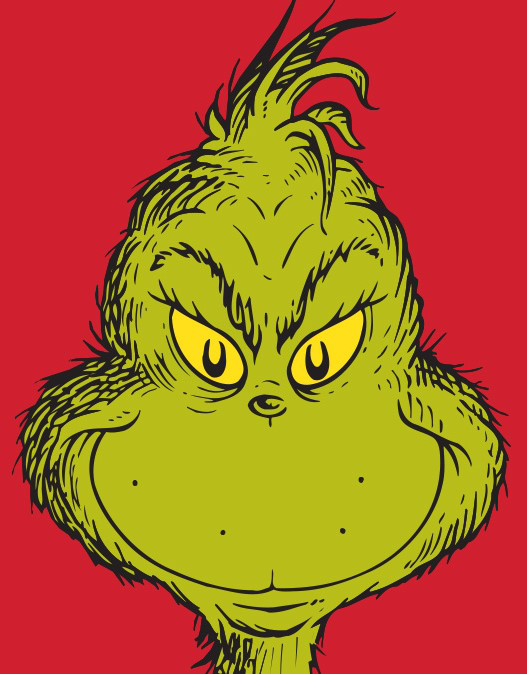

In [3]:
im

In [4]:
w,h = im.size
pixels = im.getcolors(w*h)

In [5]:
w,h

(527, 674)

In [6]:
#This returns a count for each pixel...but we'll need to shift the colors in the case of very similar
# hues being counted separately which we want counted as one color...
pixels

[(1, (72, 19, 37)),
 (1, (173, 189, 18)),
 (1, (38, 25, 0)),
 (1, (41, 25, 0)),
 (7, (32, 25, 0)),
 (1, (40, 25, 64)),
 (1, (78, 8, 0)),
 (1, (211, 25, 64)),
 (2, (55, 59, 0)),
 (2, (62, 59, 0)),
 (2, (30, 25, 0)),
 (4, (29, 25, 0)),
 (1, (28, 25, 0)),
 (1, (158, 59, 64)),
 (16, (38, 29, 0)),
 (2, (44, 29, 0)),
 (1, (50, 29, 0)),
 (4, (43, 29, 0)),
 (18, (35, 29, 0)),
 (1, (48, 29, 0)),
 (1, (31, 29, 0)),
 (1, (26, 29, 0)),
 (2, (28, 29, 0)),
 (1, (109, 119, 0)),
 (12, (54, 51, 0)),
 (2, (60, 51, 0)),
 (1, (116, 119, 0)),
 (1, (112, 119, 0)),
 (9, (57, 50, 0)),
 (1, (113, 118, 64)),
 (1, (218, 28, 64)),
 (1, (37, 20, 0)),
 (1, (29, 21, 0)),
 (1, (72, 58, 0)),
 (3, (64, 58, 0)),
 (18, (38, 41, 0)),
 (1, (70, 43, 0)),
 (2, (36, 24, 0)),
 (2, (31, 24, 0)),
 (1, (23, 24, 0)),
 (3, (30, 24, 0)),
 (1, (34, 24, 0)),
 (13, (47, 43, 0)),
 (10, (50, 43, 0)),
 (1, (33, 43, 0)),
 (9, (48, 43, 0)),
 (1, (193, 41, 64)),
 (1, (27, 43, 0)),
 (3, (47, 28, 0)),
 (8, (39, 28, 0)),
 (2, (27, 28, 0)),
 (1,

In [7]:
most_frequent_pixel = pixels[0]

In [8]:
most_frequent_pixel

(1, (72, 19, 37))

In [9]:
for count, color in pixels:
    if count > most_frequent_pixel[0]:
        most_frequent_pixel = (count, color)        

In [10]:
most_frequent_pixel

(147455, (208, 31, 47))

In [11]:
## fun with PIL's image class
#im1 = Image.open('sg.jpg')
#im2 = Image.open('gorilla.jpg')

The following is an attempt to shift all pixels to a set of colors that should be accepted for analytics purposes. Then I'll count the occurences of each color and take the top n.

In [12]:
# Convert dictionary of colors to dataframe for computational advantage
color_dict = {
    'white' : (255,255,255),
    'black' : (0,0,0),
    'red' : (255,0,0),
    'lime' : (0,255,0),
    'blue' : (0,0,255),
    'yellow' : (255,255,0),
    'cyan' : (0,255,255),
    'magenta' : (255,0,255),
    'silver' : (192,192,192),
    'gray' : (128,128,128),
    'maroon' : (128,0,0),
    'olive' : (128,128,0),
    'green' : (0,128,0),
    'purple' : (128,0,128),
    'teal' : (0,128,128),
    'navy' : (0,0,128),
    'gold' : (255,215,0),
    'tan' : (210,180,140)
}
color_frame = pd.DataFrame.from_dict(color_dict, orient='index', columns = ['r','g','b'])
color_frame

,r,g,b
white,255,255,255
black,0,0,0
red,255,0,0
lime,0,255,0
blue,0,0,255
yellow,255,255,0
cyan,0,255,255
magenta,255,0,255
silver,192,192,192
gray,128,128,128


In [13]:
# Sanity check on this getdata() method
len(list(im.getdata())) == im.size[0] * im.size[1]

True

In [14]:
# all of our pixels as a dataframe
df2 = pd.DataFrame(list(im.getdata()), columns = ['r','g','b'])
df2

,r,g,b
0,208,31,47
1,208,31,47
2,208,31,47
3,208,31,47
4,208,31,47
...,...,...,...
355193,208,31,47
355194,208,31,47
355195,208,31,47
355196,208,31,47


In [15]:
# what is the "distance" of the first pixel from all the colors 
result = abs(df2.iloc[0,:] - color_frame) **2
result

,r,g,b
white,2209,50176,43264
black,43264,961,2209
red,2209,961,2209
lime,43264,50176,2209
blue,43264,961,43264
yellow,2209,50176,2209
cyan,43264,50176,43264
magenta,2209,961,43264
silver,256,25921,21025
gray,6400,9409,6561


In [16]:
# sum the distances for each pixel 
result_sum = np.sqrt(result.sum(axis = 1))
result_sum

white      309.271725
black      215.485498
red         73.341666
lime       309.271725
blue       295.785395
yellow     233.653590
cyan       369.735040
magenta    215.485498
silver     217.260213
gray       149.566039
maroon      97.826377
olive      134.231144
green      234.269076
purple     117.991525
teal       243.380361
navy       225.357494
gold       195.637420
tan        175.653067
dtype: float64

In [17]:
# find the color with the smallest distance
result_sum[result_sum == result_sum.min()].index[0]

'red'

In [18]:
# generalize it
def color_shift(pixel,color_frame):
    
    distances = np.sqrt((abs(pixel - color_frame)**2).sum(axis = 1))
    
    return distances[distances == distances.min()].index[0]

In [19]:
# test
color_shift(df2.iloc[0,:], color_frame)

'red'

In [20]:
#%%timeit
shifted_df = df2.apply(lambda x: color_shift(x,color_frame), axis=1)

KeyboardInterrupt: 

Nope. Apply is not efficient enough. Doesn't take advantage of vectorization. Need to build a function that can take in an entire dataframe.

In [21]:
d_r = np.array([(df2.iloc[0,:].r - color_frame.r[i]) ** 2 for i in range(len(color_frame.r))])
d_g = np.array([(df2.iloc[0,:].g - color_frame.g[i]) ** 2 for i in range(len(color_frame.g))])
d_b = np.array([(df2.iloc[0,:].b - color_frame.b[i]) ** 2 for i in range(len(color_frame.b))])
numpy_distances = np.sqrt(np.sum(np.array((d_r,d_g,d_b)), axis = 0))
numpy_distances

array([309.27172519, 215.48549835,  73.34166619, 309.27172519,
       295.78539518, 233.65358974, 369.73504027, 215.48549835,
       217.26021265, 149.56603893,  97.82637681, 134.23114393,
       234.26907606, 117.99152512, 243.38036075, 225.35749377,
       195.63741973, 175.65306715])

In [22]:
np.argmin(numpy_distances)

2

In [23]:
def better_color_shift(im_df, r, g, b, color_list):
    '''
        im_df is your r,g,b dataframe
        r,g,b are three numpy arrays that when joined would yield
                the r,g,b values in a n x 3 matrix corresponding to 
                the colors in your color_list
    '''
    d_r = np.array([(im_df.r - r[i]) ** 2 for i in range(len(r))])
    d_g = np.array([(im_df.g - g[j]) ** 2 for j in range(len(g))])
    d_b = np.array([(im_df.b - g[k]) ** 2 for k in range(len(b))])
    
    # Here we combine the arrays and find the index of the shortest distance
    # and use it to find the color it corresponds to
    return color_list[np.argmin(np.sqrt(np.sum(np.array((d_r,d_g,d_b)), axis=0)))]
    

In [24]:
better_color_shift(df2.iloc[0,:], color_frame.r, color_frame.g, color_frame.b, list(color_frame.index))

'red'

In [25]:
better_color_shift(df2.iloc[:2,:], color_frame.r, color_frame.g, color_frame.b, list(color_frame.index))

'blue'

Hmm...that was weird. I'll come back to that if needed. Trying something else:

In [45]:
pd.concat([((df2 - color_frame.iloc[0]) ** 2).sum(axis=1),((df2 - color_frame.iloc[1]) ** 2).sum(axis=1)], axis= 1)

,0,1
0,95649,46434
1,95649,46434
2,95649,46434
3,95649,46434
4,95649,46434
...,...,...
355193,95649,46434
355194,95649,46434
355195,95649,46434
355196,95649,46434


In [49]:
distance_frame = pd.DataFrame()
for i in range(len(color_frame)):
    distance_frame = pd.concat([distance_frame,((df2 - color_frame.iloc[i]) ** 2).sum(axis=1)],axis=1)

In [51]:
distance_frame.columns = list(color_frame.index)

In [56]:
distance_frame

,white,black,red,lime,blue,yellow,cyan,magenta,silver,gray,maroon,olive,green,purple,teal,navy,gold,tan
0,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
1,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
2,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
3,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
4,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355193,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
355194,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
355195,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854
355196,95649,46434,5379,95649,87489,54594,136704,46434,47202,22370,9570,18018,54882,13922,59234,50786,38274,30854


In [61]:
distance_frame.idxmin(axis=1).value_counts()

red       169094
gold      112963
black      36110
olive      22641
maroon      6066
tan         6055
gray        1412
purple       437
navy         228
green        147
yellow        45
dtype: int64

In [81]:
def top_n_colors(image, color_frame, n):
    '''
        image: jpg file location
        color_frame: dataframe of the colors we want to shift to
        n: number of dominant colors we want to find
        
        function calculates the distance from each of the image's pixels
        to each discrete color we want to include in our analysis
        then takes the closest color to each pixel and returns the top
        n of those closest colors
    '''
    # Open image with PIL's Image class .open() method
    # convert to dataframe using getdata() method which 
    # returns r,g,b for each pixel 
    im = pd.DataFrame(list(Image.open(image).getdata()), columns=['r','g','b'])
    # empty df to collect distances from each pixel to each color
    distance_frame = pd.DataFrame()
    # loop through colors and add pixels distances to each color as a new column
    for i in range(len(color_frame)):
        distance_frame = pd.concat([distance_frame,((im - color_frame.iloc[i]) ** 2).sum(axis=1)],axis=1)
    # rename columns to match corresponding color
    distance_frame.columns = list(color_frame.index)
    # find min across each row - which is the closest color to that pixel with idxmin()
    # value_counts() returns a count for each unique color, we want the top n
    return distance_frame.idxmin(axis=1).value_counts()[:n]

In [82]:
top_n_colors('thegrinch.jpg', color_frame, 3)

red      169094
gold     112963
black     36110
dtype: int64

In [83]:
top_n_colors('buzz.jpg', color_frame, 3)

white    256746
black    135044
gold      75963
dtype: int64

In [84]:
top_n_colors('gorilla.jpg', color_frame, 3)

black    191472
white     23113
green     14212
dtype: int64

In [85]:
top_n_colors('sg.jpg', color_frame, 3)

white     69458
gray      68980
silver    57060
dtype: int64